In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import pickle
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [155]:
# Load the dataset, drop some unneccessary column to resize
data = pd.read_csv("final_merged_data.csv")
data = data.loc[:, ~data.columns.str.contains("quality_indicator")]

In [156]:
pd.set_option('display.max_columns', None)
data.describe()



,station_id,num_bikes_available,num_docks_available,lat,lon,capacity,stno,year,month,day,hour,minute,max_air_temperature_celsius,min_air_temperature_celsius,air_temperature_std_deviation,max_grass_temperature_celsius,min_grass_temperature_celsius,grass_temperature_std_deviation,max_soil_temperature_5cm_celsius,min_soil_temperature_5cm_celsius,soil_temperature_std_deviation_5cm,max_soil_temperature_10cm_celsius,min_soil_temperature_10cm_celsius,soil_temperature_std_deviation_10cm,max_soil_temperature_20cm_celsius,min_soil_temperature_20cm_celsius,soil_temperature_std_deviation_20cm,max_earth_temperature_30cm_celsius,min_earth_temperature_30cm_celsius,earth_temperature_std_deviation_30cm,max_earth_temperature_50cm_celsius,min_earth_temperature_50cm_celsius,earth_temperature_std_deviation_50cm,max_earth_temperature_100cm_celsius,min_earth_temperature_100cm_celsius,earth_temperature_std_deviation_100cm,max_relative_humidity_percent,min_relative_humidity_percent,relative_humidity_std_deviation,max_barometric_pressure_hpa,min_barometric_pressure_hpa,barometric_pressure_std_deviation
count,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.0,298946.0,298946.0,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000
mean,57.967138,12.204733,19.335198,53.345521,-6.263842,31.979003,175.0,2024.0,12.0,15.717484,11.522128,24.878941,7.855169,7.716685,0.040432,6.564362,6.229473,0.100257,7.047128,7.007714,0.009456,7.159650,7.125825,0.007945,7.258614,7.225430,0.007645,7.390959,7.358199,0.007551,7.995048,7.964415,0.007055,9.437616,9.406651,0.007106,85.021124,83.548719,0.377589,1014.855870,1014.689671,0.045488
std,33.958176,9.761814,11.001506,0.007538,0.017855,7.459101,0.0,0.0,0.0,8.896832,6.280459,17.112726,3.123094,3.136997,0.038731,3.901582,3.946463,0.105303,1.508867,1.509558,0.003023,1.232544,1.233239,0.001651,0.975946,0.976103,0.001110,0.876321,0.876168,0.001084,0.537950,0.537683,0.000938,0.280474,0.280232,0.000920,7.867297,8.160979,0.232676,11.823993,11.894264,0.038661
min,1.000000,0.000000,0.000000,53.330090,-6.310015,16.000000,175.0,2024.0,12.0,1.000000,0.000000,0.000000,-3.448000,-3.521000,0.003000,-8.950000,-9.050000,0.006000,3.231000,3.195000,0.004000,4.578000,4.545000,0.004000,5.285000,5.251000,0.005000,5.624000,5.593000,0.004000,6.903000,6.875000,0.004000,9.030000,9.000000,0.004000,56.700000,52.970000,0.072000,975.060000,975.010000,0.004000
25%,28.000000,4.000000,11.000000,53.339764,-6.275071,29.000000,175.0,2024.0,12.0,8.000000,7.000000,10.000000,5.736000,5.615000,0.017000,4.282000,4.014000,0.032000,5.899000,5.849000,0.007000,6.196000,6.166000,0.007000,6.422000,6.390000,0.007000,6.655000,6.622000,0.007000,7.533000,7.503000,0.006000,9.250000,9.220000,0.006000,80.600000,78.910000,0.230000,1006.010000,1005.770000,0.022000
50%,57.000000,11.000000,19.000000,53.345203,-6.262501,30.000000,175.0,2024.0,12.0,16.000000,12.000000,20.000000,7.955000,7.790000,0.030000,7.140000,6.773000,0.066000,7.108000,7.069000,0.009000,7.140000,7.108000,0.008000,7.200000,7.166000,0.008000,7.344000,7.315000,0.008000,7.969000,7.939000,0.007000,9.340000,9.310000,0.007000,86.000000,84.700000,0.314000,1017.210000,1017.060000,0.034000
75%,88.000000,19.000000,28.000000,53.350292,-6.250900,40.000000,175.0,2024.0,12.0,23.000000,16.000000,40.000000,10.190000,10.070000,0.052000,9.460000,9.150000,0.130000,8.350000,8.320000,0.011000,8.260000,8.230000,0.009000,8.140000,8.110000,0.008000,8.180000,8.150000,0.008000,8.490000,8.460000,0.008000,9.650000,9.620000,0.008000,90.300000,89.000000,0.450000,1022.660000,1022.570000,0.057000
max,117.0

Station 1


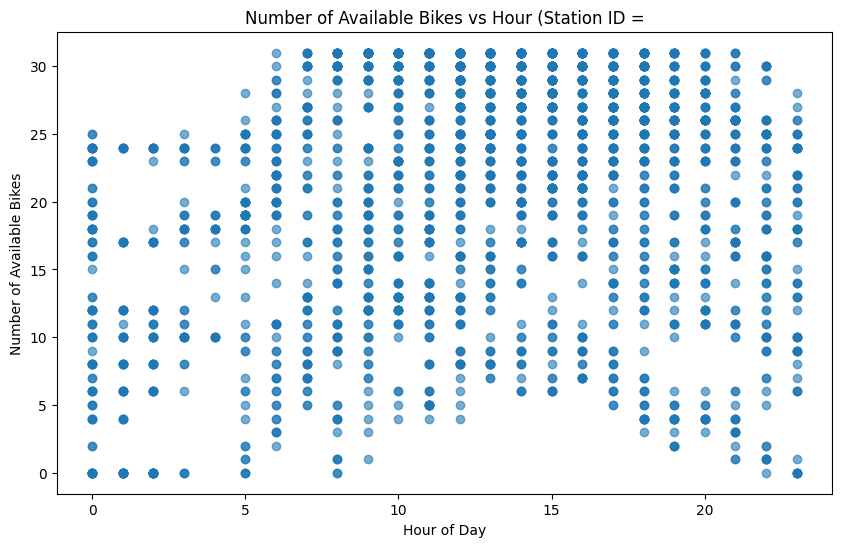

Station 2


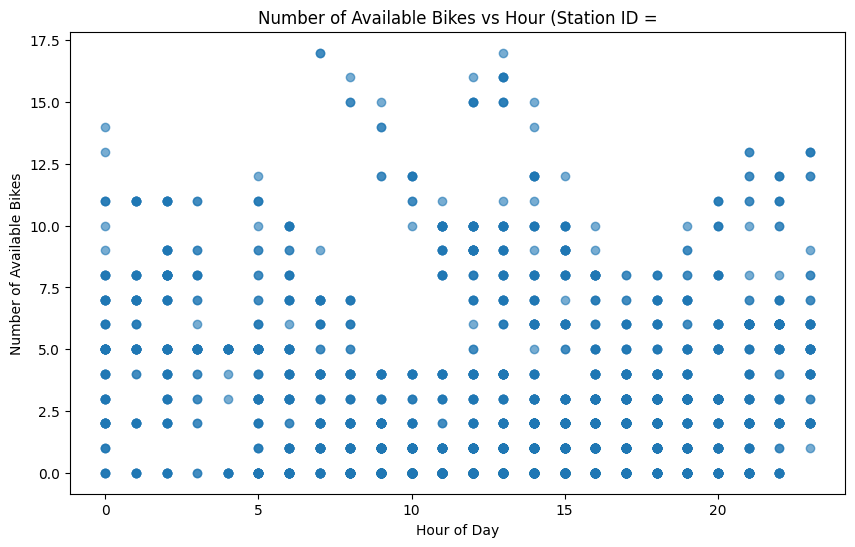

Station 3


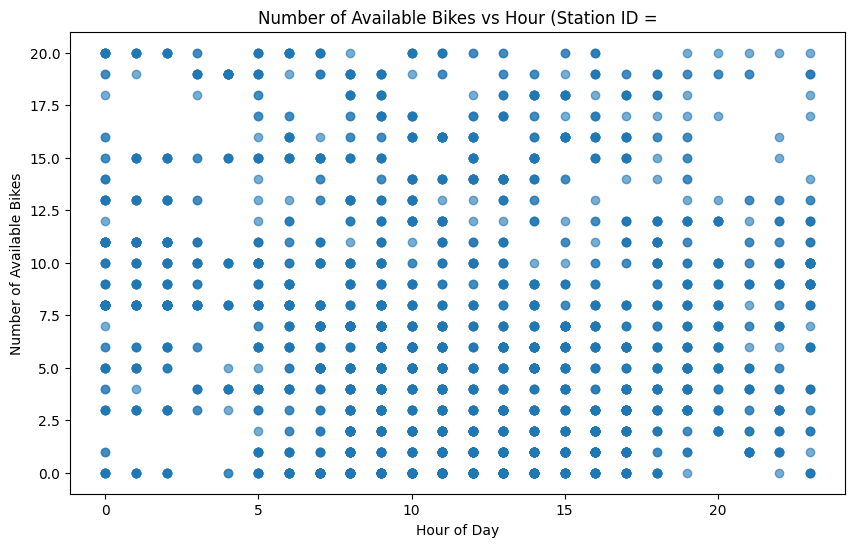

Station 4


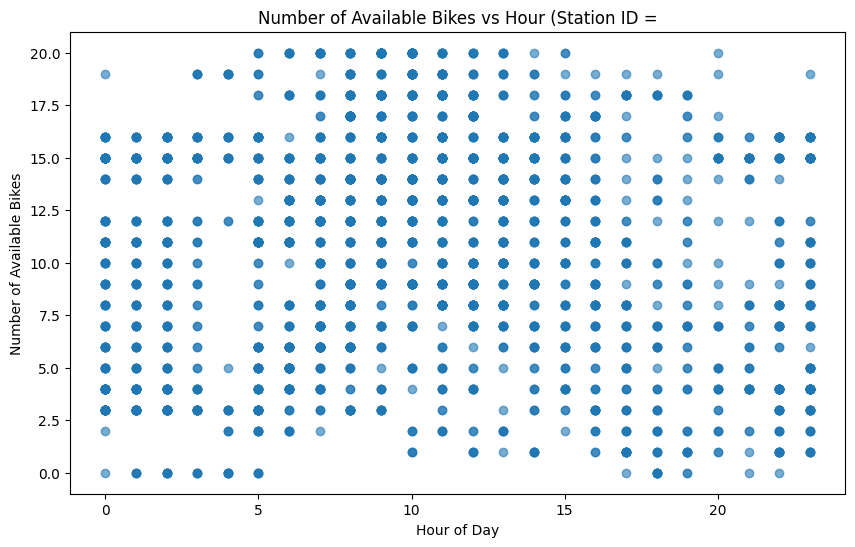

Station 5


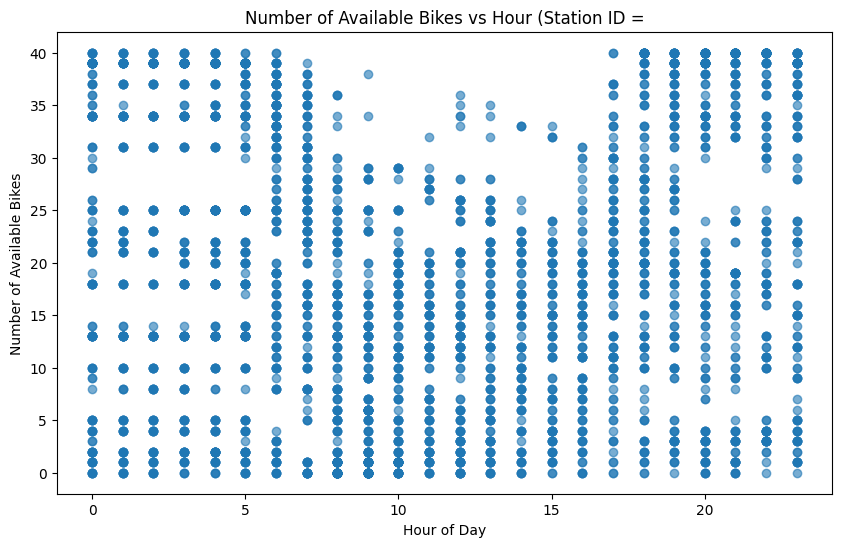

Station 6


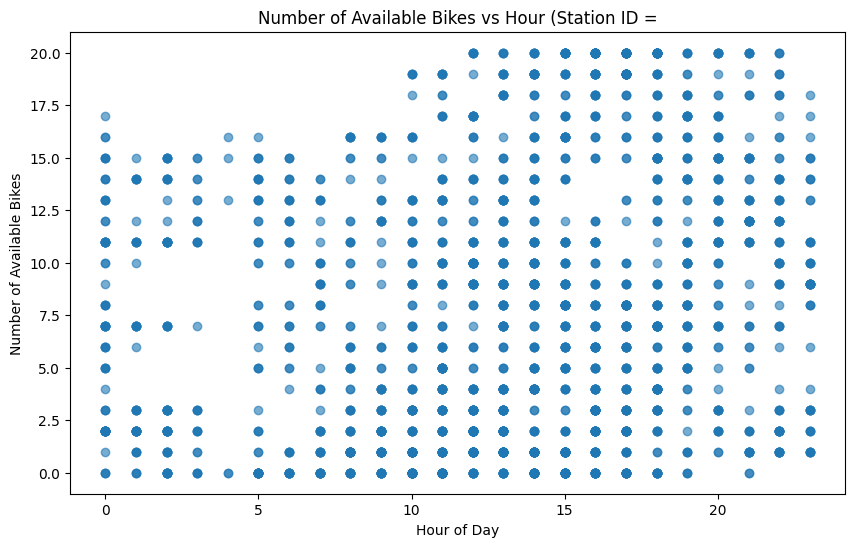

Station 7


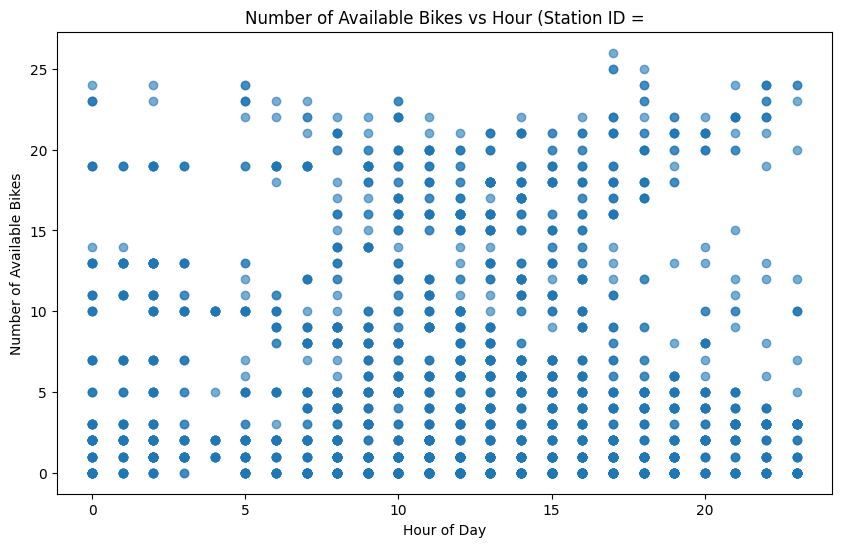

Station 8


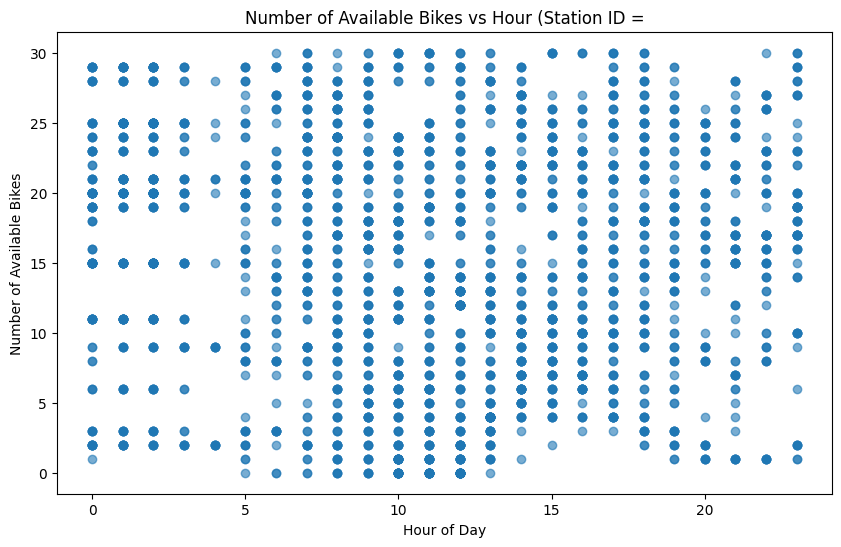

Station 9


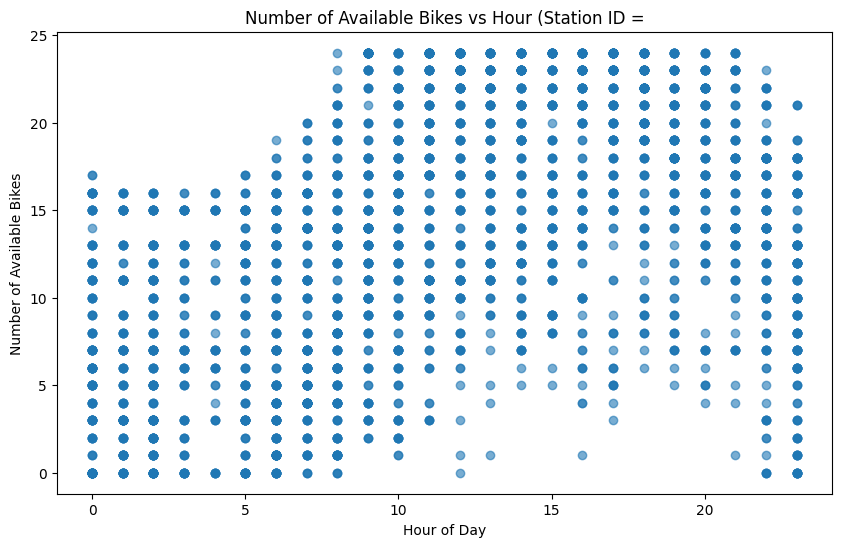

Station 10


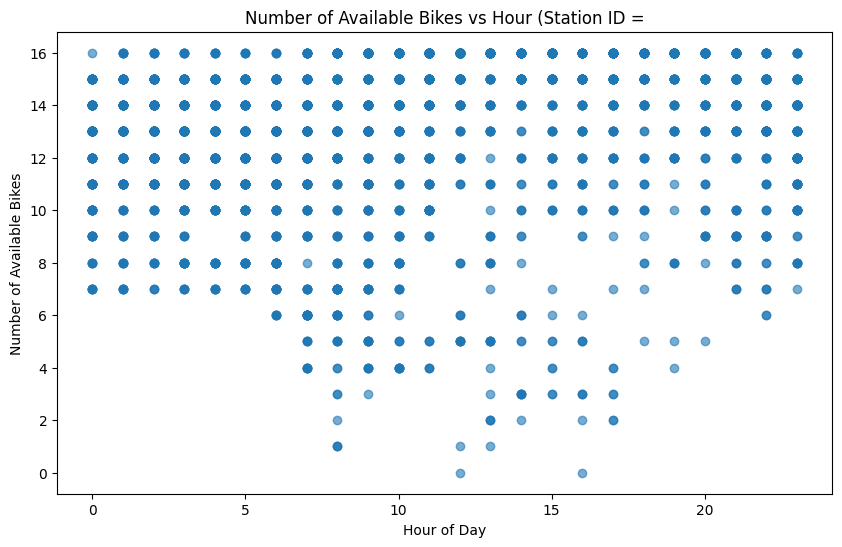

Station 11


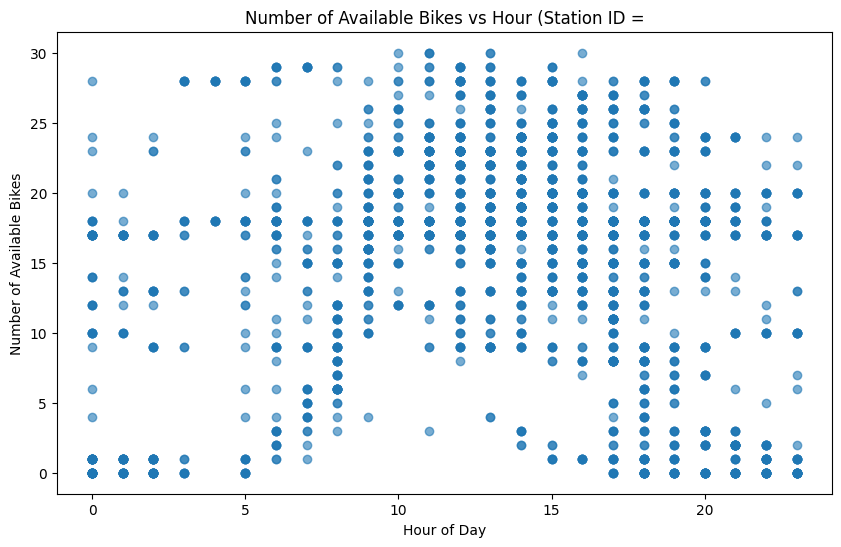

Station 12


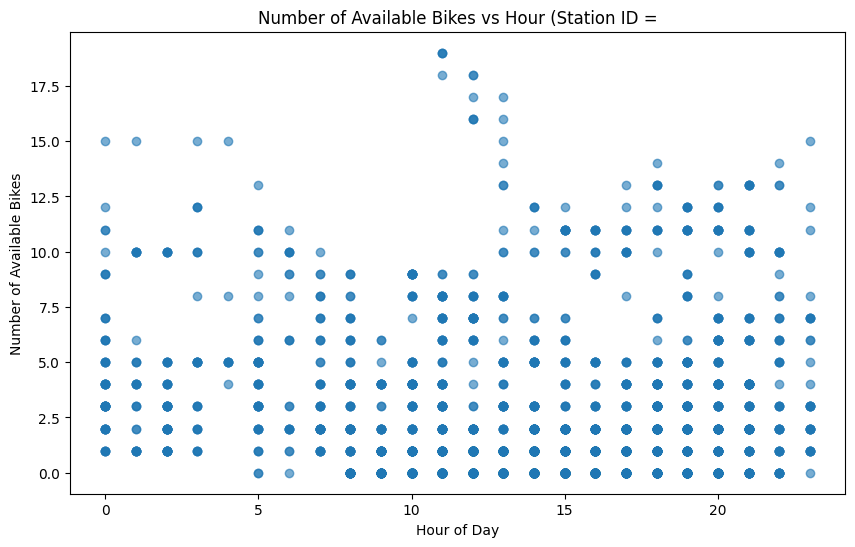

Station 13


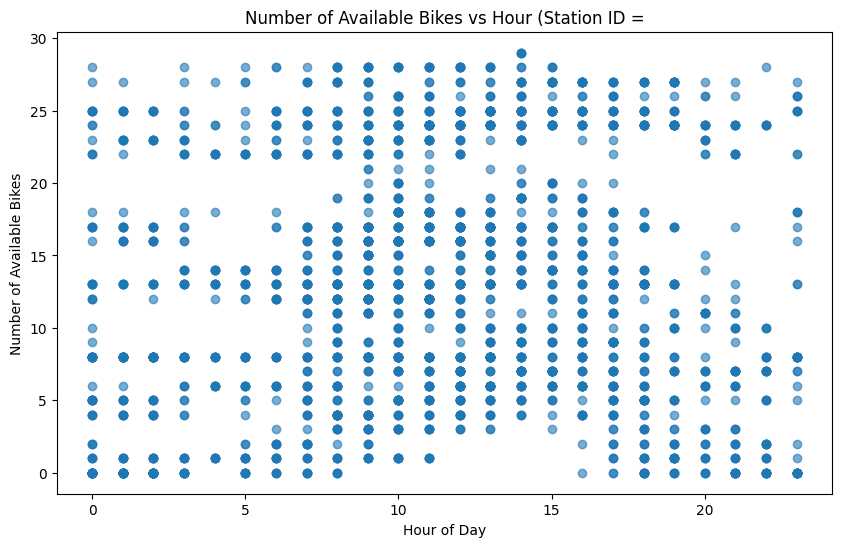

Station 14


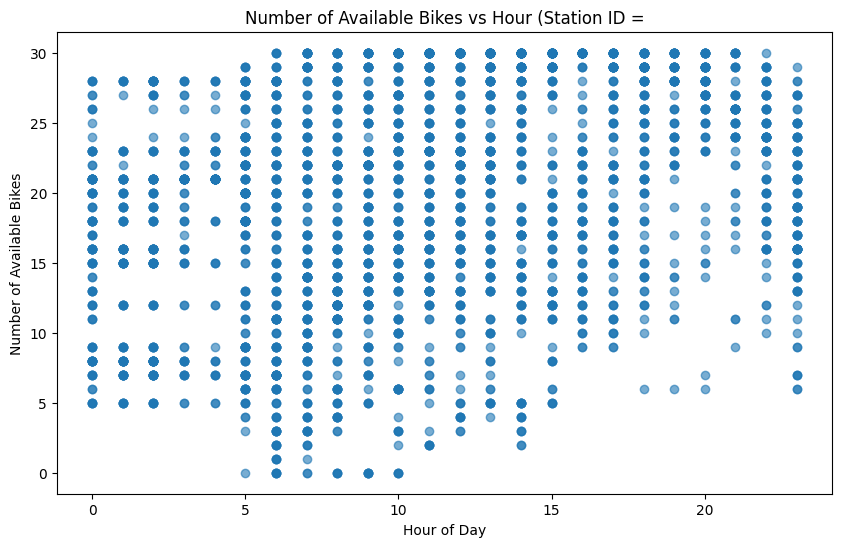

Station 15


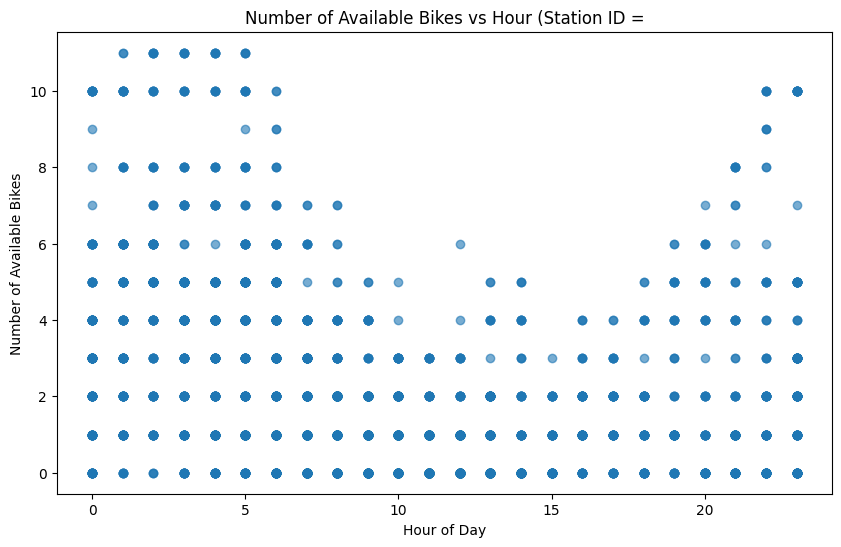

Station 16


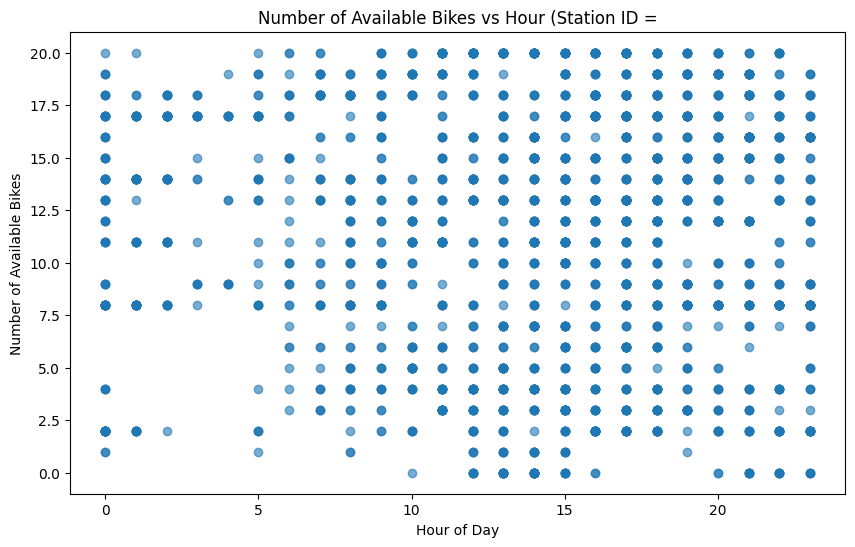

Station 17


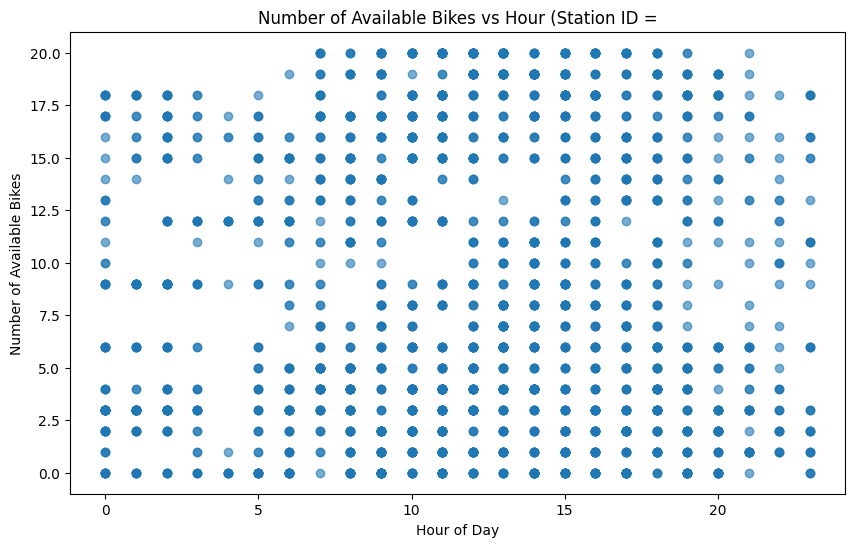

Station 18


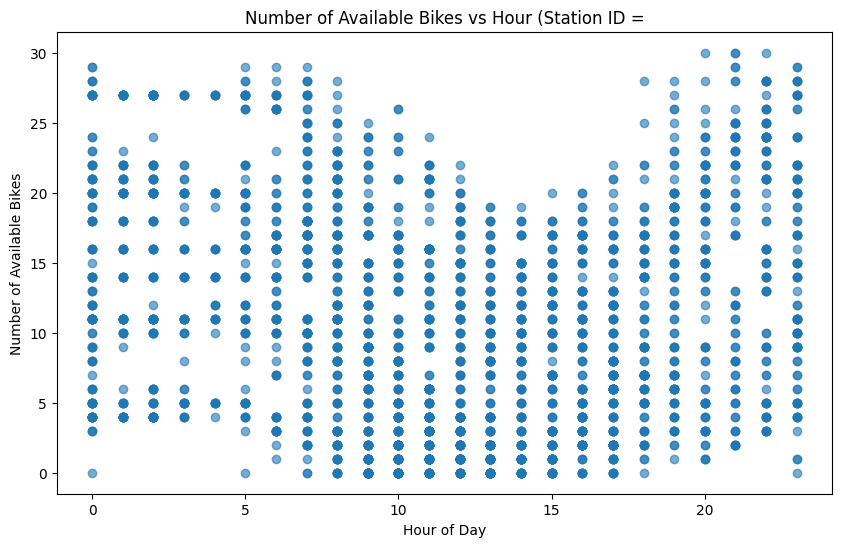

Station 19


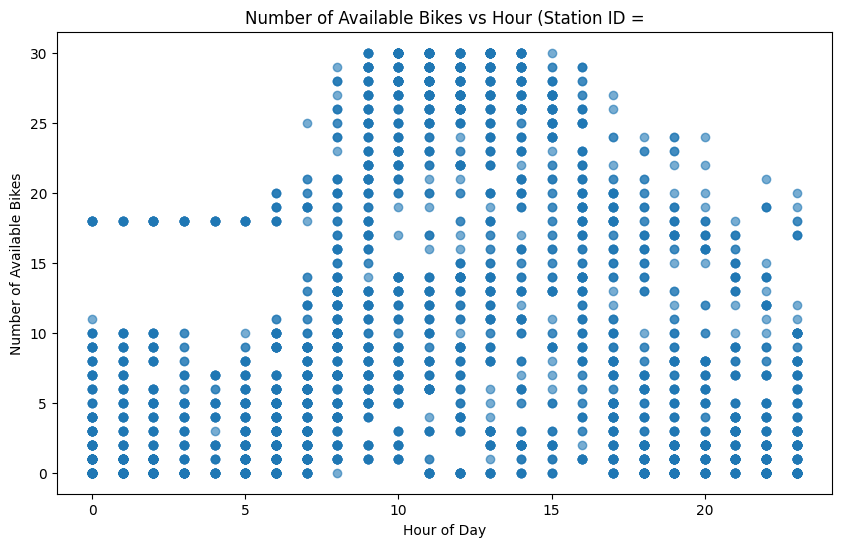

In [210]:
import matplotlib.pyplot as plt
for id in range(1,20):
    data_station= data[data["station_id"] == id]

    # Create a scatter plot of num_bikes_available vs hour
    print ("Station",id)
    plt.figure(figsize=(10, 6))
    plt.scatter(data_station["hour"], data_station["num_bikes_available"], alpha=0.6)
    plt.title("Number of Available Bikes vs Hour (Station ID =")
    plt.xlabel("Hour of Day")
    plt.ylabel("Number of Available Bikes")
    plt.show()


In [157]:
#PREPARE DATA

# Handle missing values (drop rows with NaN in lagged features)
data.dropna(inplace=True)
# Calculate avg for weather:
data['temperature'] = (data['max_air_temperature_celsius'] + data['min_air_temperature_celsius']) / 2
data['humidity'] = (data['max_relative_humidity_percent'] + data['min_relative_humidity_percent']) / 2
data['pressure'] = (data['max_barometric_pressure_hpa'] + data['min_barometric_pressure_hpa']) / 2
#Calculate day of week:
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data['day_of_week'] = data['date'].dt.weekday
data = data[['station_id','temperature', 'humidity', 'pressure', 'hour', 'day_of_week', 'num_bikes_available']]
# Save the cleaned version
data.to_csv("final_data_for_ml.csv", index=False)


In [213]:
data = pd.read_csv("final_data_for_ml.csv")
data['station_id'] = data['station_id'].astype('category')
data.head()
data.describe()

,temperature,humidity,pressure,hour,day_of_week,num_bikes_available
count,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000,298946.000000
mean,7.785927,84.284922,1014.772770,11.522128,2.923478,12.204733
std,3.129450,8.004812,11.859002,6.280459,2.060851,9.761814
min,-3.484500,55.070000,975.035000,0.000000,0.000000,0.000000
25%,5.676500,79.770000,1005.915000,7.000000,1.000000,4.000000
50%,7.872000,85.350000,1017.125000,12.000000,3.000000,11.000000
75%,10.125000,89.600000,1022.615000,16.000000,5.000000,19.000000
max,14.630000,98.850000,1035.775000,23.000000,6.000000,40.000000


In [237]:
def hour_to_bin(hour): #Function to create small hour bins
    if 6 <= hour < 10:
        return "morning_rush"    # 6–9
    elif 10 <= hour < 16:
        return "midday"          # 10–15
    elif 16 <= hour < 20:
        return "evening_rush"    # 16–19
    else:
        return "night"           # 20–5

data["hour_bin"] = data["hour"].apply(hour_to_bin)
data["is_weekend"] = data["day_of_week"].apply(lambda d: 1 if d >= 5 else 0)
data['station_hour'] = data['station_id'].astype(str) + "_" + data['hour_bin'].astype(str)

# Define features and target
features = ['temperature', 'humidity', 'pressure', 'hour', 'day_of_week']
target = 'num_bikes_available'



In [241]:
#TRAINING 
station_pipelines = {}
for station_id in data['station_id'].unique():
    station_data = data[data['station_id'] == station_id]
    X = station_data[features]
    y = station_data[target]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # --- Define preprocessing for categorical column ---
    categorical_features = ['hour']
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first'), categorical_features)  # Using one-hot encoder to create dummy variable for categorical
        ],
        remainder='passthrough' 
    )

    # --- Create pipeline with preprocessing and model ---
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])
    # Train a linear regression model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print ("Station ID", station_id)
    print(f"Mean Absolute Error: {mae}")
    print(f"R² Score: {r2}")

    # Access the trained model from inside the pipeline
    regressor = pipeline.named_steps['regressor']

    # Get the one-hot encoder from the pipeline
    ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']

    # Generate the names of the one-hot encoded features
    ohe_feature_names = ohe.get_feature_names_out(categorical_features)

    # Define numerical features manually (not encoded)
    numeric_features = ['temperature', 'humidity', 'pressure', 'day_of_week', 'hour']

    station_pipelines[station_id] = pipeline

# Combine all feature names
'''all_feature_names = list(ohe_feature_names) + numeric_features
print("\nModel Coefficients:")
for feature, coef in zip(all_feature_names, regressor.coef_):
    print(f"{feature}: {coef}")
print(f"Intercept: {regressor.intercept_}")'''

     
# Save the model to a .pkl file
model_filename = "bike_availability_model.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(station_pipelines, file)

print(f"Model saved to {model_filename}")

Station ID 10
Mean Absolute Error: 2.0769173168567296
R² Score: 0.19542724715791082
Station ID 100
Mean Absolute Error: 5.177671920253557
R² Score: 0.38267949844148186
Station ID 109
Mean Absolute Error: 5.508892096816681
R² Score: 0.30829643421829245
Station ID 11
Mean Absolute Error: 5.523619906230302
R² Score: 0.16887692625519135
Station ID 114
Mean Absolute Error: 5.9559775114237
R² Score: 0.41678782882035914
Station ID 116
Mean Absolute Error: 5.816849984797019
R² Score: 0.17652537401952684
Station ID 13
Mean Absolute Error: 5.282003649827375
R² Score: 0.4037412361802527
Station ID 14
Mean Absolute Error: 5.4622926693019656
R² Score: 0.24493028997862298
Station ID 15
Mean Absolute Error: 1.513586804894901
R² Score: 0.34941590665771494
Station ID 17
Mean Absolute Error: 3.9350604109782146
R² Score: 0.3957198933478425
Station ID 18
Mean Absolute Error: 5.462117977469322
R² Score: 0.2935483455410731
Station ID 19
Mean Absolute Error: 5.84297905881639
R² Score: 0.40372154613070943
Sta

In [197]:

# Load the saved model
with open("bike_availability_model.pkl", "rb") as file:
    model = pickle.load(file)

# Define new input data for prediction
new_data = pd.DataFrame({
    'station_id': [5],
    'temperature': [9.55],
    'humidity': [88],
    'pressure': [1022],
    'hour': [16],
    'day_of_week': [1]  
})

# Make prediction
prediction = model.predict(new_data)
# Output prediction
print(f"Predicted number of available bikes: {round(prediction[0])}")



Predicted number of available bikes: 18


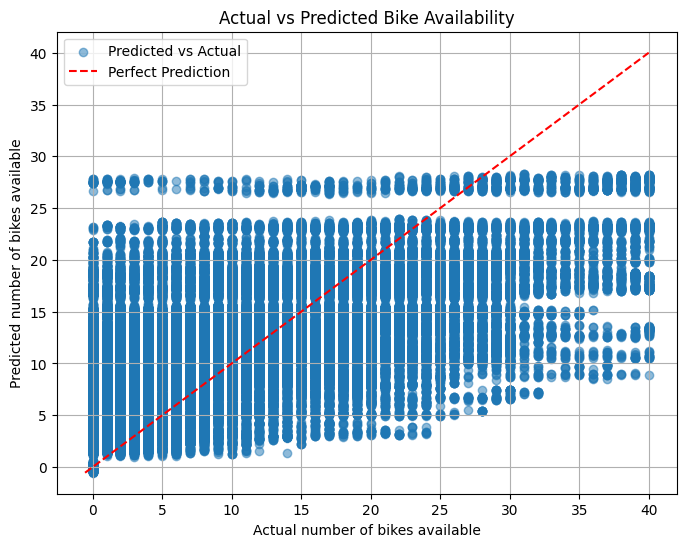

In [158]:
#TESTING
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')

# Plot perfect prediction line (y = x)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual number of bikes available")
plt.ylabel("Predicted number of bikes available")
plt.title("Actual vs Predicted Bike Availability")
plt.legend()
plt.grid(True)
plt.show()


In [162]:
print(y_train.mean()) 
frequency_table = data['num_bikes_available'].value_counts(normalize=True).sort_index() * 100

print(frequency_table)


12.232555361221818
num_bikes_available
0     9.576646
1     6.116155
2     5.001907
3     4.201093
4     3.800686
5     3.599981
6     3.495615
7     3.400280
8     3.416671
9     3.202920
10    3.254434
11    3.086845
12    3.025965
13    3.453801
14    3.163113
15    3.174152
16    3.117620
17    2.875101
18    3.068447
19    2.707178
20    2.820576
21    2.038161
22    1.928107
23    1.839128
24    1.769550
25    1.743459
26    1.340041
27    1.240023
28    1.414302
29    1.395570
30    1.593264
31    0.579369
32    0.499087
33    0.384685
34    0.355248
35    0.327484
36    0.329491
37    0.343875
38    0.330494
39    0.489052
40    0.500425
Name: proportion, dtype: float64
